## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [42]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [43]:

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [44]:

rows, columns = df.shape
print("The data frame has "+ str(rows) +" rows and " + str(columns) + " columns")

The data frame has 294478 rows and 5 columns


c. The number of unique users in the dataset.

In [45]:
# No. of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [46]:
# The proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [47]:
# The number of new_page and treatment donot match 
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').count()


user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [48]:
df.isnull()

,user_id,timestamp,group,landing_page,converted
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
294473,False,False,False,False,False
294474,False,False,False,False,False
294475,False,False,False,False,False
294476,False,False,False,False,False


Based on the cell above, there are no missing values in the dataset

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [52]:
# define a new dataframe df2
df_newpage_treatment = df.query('landing_page == "new_page" & group == "treatment"')
df_oldpage_control = df.query('landing_page == "old_page" & group == "control"')
df2 = df_newpage_treatment.append(df_oldpage_control, ignore_index=True)
df2.tail()

,user_id,timestamp,group,landing_page,converted
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [41]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [53]:
# No. of unique users in the dataset
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [54]:
# display the duplicated user_id
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [55]:
# Display the information of the repeated user_id
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [56]:
# Drop one of the rows that belongs to the repeated user_id
df2.drop(938, inplace=True)

In [57]:
# disply info of  user_id to check  the drop is work correctly
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [58]:
#  Probability of converting 
df2.converted.mean()


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#  Probability of control group they are converting  
df2[df2['group']=='control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [59]:
#  Probability of treatment group they are converting  
df2[df2['group']=='treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [60]:
#  Probability of new page
df2[df2['landing_page']== 'new_page'].count()/len(df2)

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**probability of an individual converting regardless of the page they receive=0.119 <br/>
Probability of control group they are converting  =0.12 <br/>
Probability of treatment group they are converting  =0.118 <br/>**

**The probablity users converted in both control and treatment group are similar to each other
therefore, there is no evidence that new page leads to more conversions.
we need to define our test hypothesis and calculate p-value for the new and old pages**



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothese is** H0: p_old >= p_new 
**Alternative hypothese is** H1: p_new   > p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [61]:
#  convert rate for  𝑝𝑛𝑒𝑤  equal to the converted
p_new = df2.converted.mean()
p_new 

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [62]:
#  convert rate for  𝑝𝑜𝑙𝑑 equal to the converted
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [63]:
#  Compute the number of unique users who has new page using df2 dataframe
n_new = df2[df2['landing_page'] == 'new_page'].count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [64]:
#  Compute the number of unique users who has old page using df2 dataframe
n_old = df2[df2['landing_page'] == 'old_page'].count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [65]:
#Simulate  n_new  transactions with a convert rate of  p_new  under the null
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted 


array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [66]:
#Simulate  n_old  transactions with a convert rate of  p_old  under the null
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 0, ..., 1, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [69]:
#Compute the probablity of new page converted rate
new_page_converted.mean()


0.8803729956644415

In [70]:
#Compute the probablity of old page converted rate
old_page_converted.mean()


0.8785123284276608

In [71]:
#Find  pnewpnew  -  poldpold  
new_page_converted.mean() - old_page_converted.mean()


0.0018606672367806887

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [72]:
p_diffs =[]
for i in range (10000):
    new_page_converted=  np.random.choice([1,0],size=n_new, p=[p_new,(1-p_new)])
    old_page_converted = np.random.choice([1,0],size=n_old, p=[p_old,(1-p_old)])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'Simulate 10,000 for p_diffs')

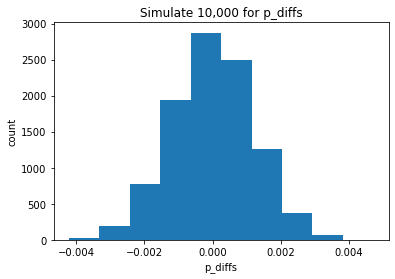

In [73]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('count')
plt.title('Simulate 10,000 for p_diffs')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [74]:
actual_diff = df2[df2['group']=='treatment'].converted.mean()- df2[df2['group']=='control'].converted.mean()
actual_diff

-0.0015782389853555567

Text(0.5, 1.0, 'Simulate 10,000 for actual_diff ')

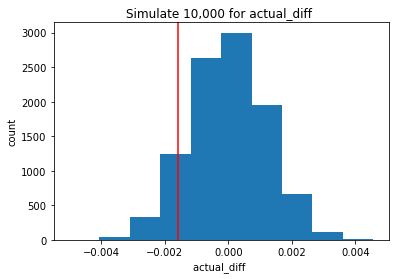

In [31]:
plt.hist(p_diffs )
plt.axvline(actual_diff , color='red')
plt.xlabel('actual_diff ')
plt.ylabel('count')
plt.title('Simulate 10,000 for actual_diff ')

In [76]:
# Convert p_diffs to array

p_diffs = np.array(p_diffs)

# Calculate the propotion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > actual_diff).mean()

0.9087

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value above show that the  p-value =0.9087 which is < 0.95 and >0.05 which transelate  the Null Hypothesis is true.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [77]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))
convert_old , convert_new,n_old,n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [78]:

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [79]:
# Shows the significance of the z_score
from scipy.stats import norm

print(norm.cdf(z_score))

0.9050583127590245


**we can not reject the null hypothesis beacuse the  value of z-score = 1.3109 does not exceed the critical value of 1.96 which is equal  the results in parts j & k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression, that response variable is categorical variable.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [91]:
#create a colum for the intercept
df2['intercept'] = 1
#create a dummy variable column for which page each user received
df2[['c', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('c', axis=1, inplace=True)


df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [92]:
#Create Logitc regression model for conveted variable and  intercept col
logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [93]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        19:15:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**p-value = 1.9**
**The null hypotheses is  there is no difference between the treatment and control group.<br/>
 Alternative hypotheses is  there is difference  between the treatment and control group**


**The difference is the logistic regression part two-sided testin while in part II, we performed a one-sided test**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factor can be the age of users. We can check if the converted rate depends on age catogries.
Disadavantage for adding additional terms into regression model is that it will make interpretate the model more complex .**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [94]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0


In [95]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [97]:
### Create the necessary dummy variables
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK','US']]
df_new.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,1,0


In [98]:
## Fit Your Linear Model And Obtain the Results
logis_mod = sm.Logit(df_new['converted'], df_new[['intercept','UK', 'US']])
results = logis_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:               1.521e-05
Time:                        19:26:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**The country has no effect on the conversion rate.<br/>
the p-value of UK is 0.074 while US is 0.129.  there is no evidence that new page leads to more conversions.<br/>
So, there's no evidenceof either country or landing page which  effect on the conversion rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [100]:
df_new['page_UK'] = df_new['ab_page'] * df_new['UK']
df_new['page_US'] = df_new['ab_page'] * df_new['US']
logis_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'page_UK', 'page_US']])
results = logis_mod2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 05 Dec 2020   Pseudo R-squ.:               3.482e-05
Time:                        19:42:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
page_UK        0.0783      0.057      1.378      0.168      -0.033       0.190
page_US        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**The result show there is no effect of the page and country on converted rate .**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])